In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())



'2018-10-12 15:33:19.431876'

In [3]:
df = pd.read_csv('../../measurements/Excel Files/task 1/Mass Balance/station_45005.csv', skiprows=1)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['WSPD'] = pd.to_numeric(df['WSPD'], errors='coerce')
df['GST'] = pd.to_numeric(df['GST'], errors='coerce')
df['ATMP'] = pd.to_numeric(df['ATMP'], errors='coerce')
df['YY'] = pd.to_numeric(df['YY'], errors='coerce')

In [5]:
df=df.groupby(['YY']).mean().reset_index()

In [6]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [7]:
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

In [8]:
Precip_mm.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Total
0,1900.0,55.1,108.5,65.8,43.2,47.8,69.6,125.7,73.7,49.3,55.4,100.3,22.9,817.3
1,1901.0,49.3,43.7,66.0,69.1,75.9,61.5,77.7,79.5,65.8,31.8,58.2,100.1,778.6
2,1902.0,39.9,28.2,57.7,41.1,94.0,151.9,156.0,34.0,124.0,59.9,43.9,69.6,900.2
3,1903.0,51.1,83.6,62.7,100.8,49.3,104.9,138.9,117.9,47.8,61.5,41.4,58.7,918.6
4,1904.0,105.9,71.6,101.1,67.8,80.8,37.8,91.7,78.0,71.6,55.4,7.1,55.1,823.9


In [9]:
Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)

In [10]:
Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')

In [11]:
WindSpeed_Overlake = pd.read_excel('../../measurements/glerl/WindSpeed_Overlake.xlsx', sheetname='ERI', skiprows=3)

In [12]:
WindSpeed_Overlake['Annual'] = pd.to_numeric(WindSpeed_Overlake['Annual'], errors='coerce')
WindSpeed_Overlake['Year'] = pd.to_numeric(WindSpeed_Overlake['Year'], errors='coerce')

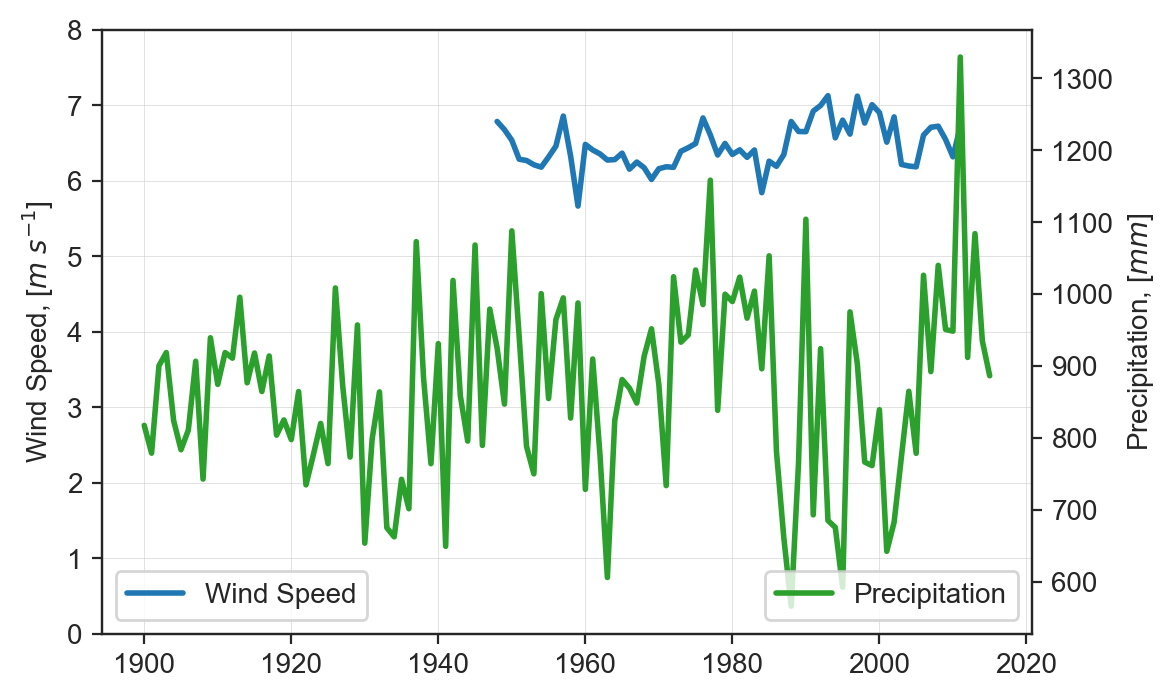

In [13]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# axes.plot(df.YY, df.WSPD, c=sns.color_palette()[0])
axes.plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2)
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes.plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
# axes.set_xlim(1950,2015)
#     ax.set_ylim(0,15)
axes.set_xlabel('')
axes.grid(lw=0.2)
ax2 = axes.twinx()
ax2.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[2], lw=2)
# ax2.plot(Runoff_mm.YEAR, Runoff_mm.Ann, 'k-.', lw=2)
ax2.legend(['Precipitation', 'Runoff'], loc=4)
axes.legend(['Wind Speed'], loc=3)
# ax2.set_ylim(0,2000)
axes.set_ylim(0,8)
axes.set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
ax2.set_ylabel('Precipitation, [$mm$]')
f.savefig('Mass Balance/wind_precip_1900.pdf')

In [14]:
import numpy as np

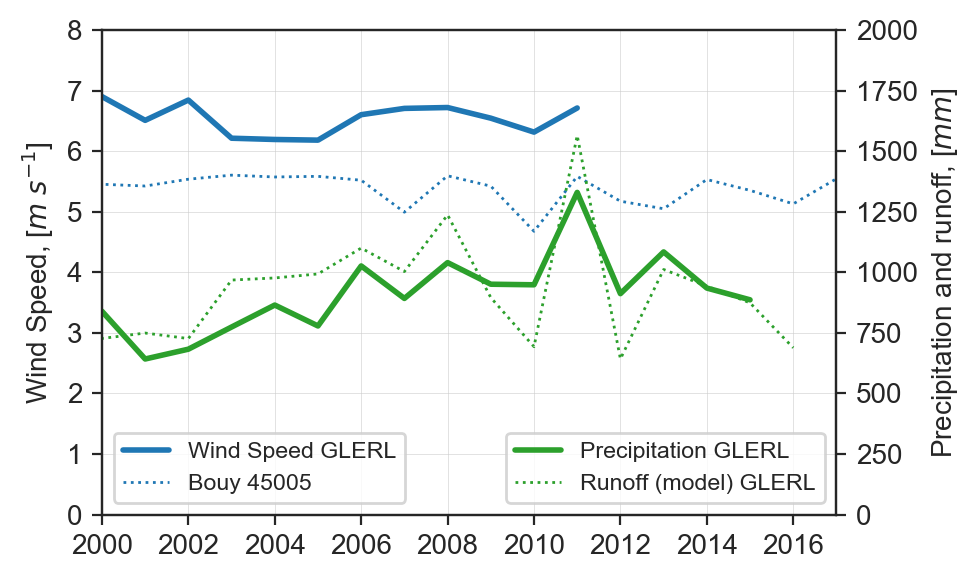

In [17]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)
axes.plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2, label='Wind Speed GLERL')
axes.plot(df.YY, df.WSPD, c=sns.color_palette()[0], lw=1, ls=':', label='Bouy 45005')
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes.plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
axes.set_xlim(2000,2017)
axes.set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes.set_xlabel('')
axes.grid(lw=0.2)
ax2 = axes.twinx()
ax2.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[2], lw=2, label='Precipitation GLERL')
ax2.plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls=':', lw=1, label='Runoff (model) GLERL')
ax2.legend(loc=4, fontsize='small')
axes.legend(loc=3,fontsize='small')
ax2.set_ylim(0,2000)
axes.set_ylim(0,8)
axes.set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
ax2.set_ylabel('Precipitation and runoff, [$mm$]')
plt.tight_layout()
f.savefig('Mass Balance/wind_precip_2000.png')

In [57]:
ax.get_xlim()

(-0.5, 37.5)

array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.])